<a href="https://colab.research.google.com/github/HakimSkaik/Autonomous-Car/blob/main/MNIST_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0]== y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0]== y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:]== (28,28)), "The dimensions of the images are not 28x28"
assert(X_train.shape[1:]== (28,28)), "The dimensions of the images are not 29x28"

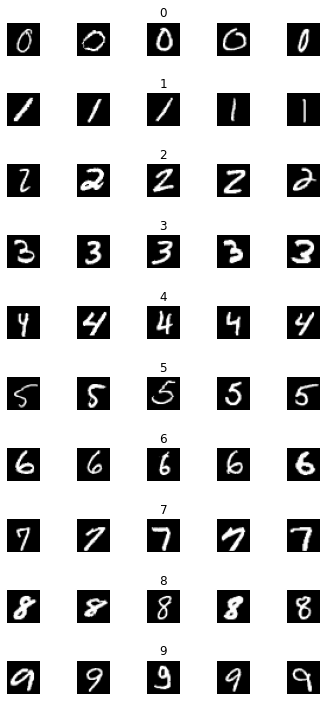

In [ ]:
num_of_samples= []


cols=5
num_classes=10

fig, axs= plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected= X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected -1)), :,:] ,cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

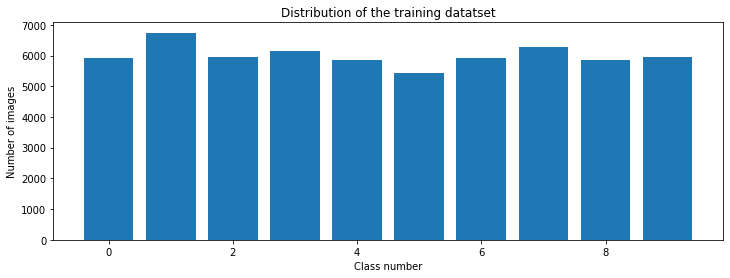

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training datatset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [ ]:
X_train= X_train/255
X_test=X_test/255

In [ ]:
num_pixels= 784
X_train= X_train.reshape(X_train.shape[0], num_pixels)
X_test= X_test.reshape(X_test.shape[0], num_pixels)

In [ ]:
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model= create_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                7850      
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history= model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 0.5402 - accuracy: 0.8320 - val_loss: 0.2999 - val_accuracy: 0.9133
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3216 - accuracy: 0.9080 - val_loss: 0.2398 - val_accuracy: 0.9317
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.9160 - val_loss: 0.2209 - val_accuracy: 0.9380
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2658 - accuracy: 0.9234 - val_loss: 0.2174 - val_accuracy: 0.9393
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2545 - accuracy: 0.9262 - val_loss: 0.2055 - val_accuracy: 0.9437
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2444 - accuracy: 0.9291 - val_loss: 0.2073 - val_accuracy: 0.9413
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.9280 - val_loss: 0.2201 - val_accuracy: 0.9402
Epoch 

Text(0.5, 0, 'epoch')

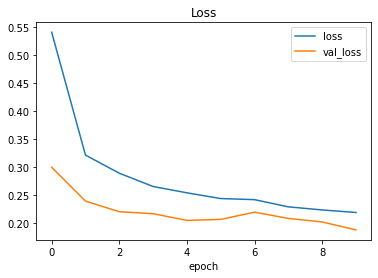

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("Loss")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

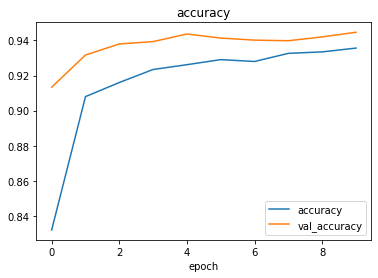

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("accuracy")
plt.xlabel('epoch')

In [ ]:
score= model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test_accuracy:', score[1])

<class 'list'>
Test score: 0.23987065255641937
Test_accuracy: 0.9337000250816345


<Response [200]>


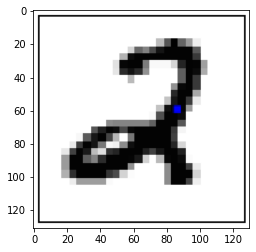

In [ ]:
import requests
from PIL import Image
url='https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response= requests.get(url, stream=True)
print(response)
img= Image.open(response.raw)
plt.imshow(img)

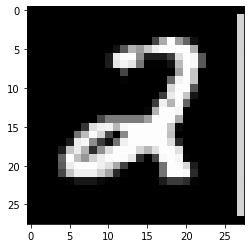

In [ ]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1, 784)

In [ ]:
prediction = np.argmax(model.predict(img), axis =-1)

print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 86ms/step
predicted digit: [2]
